### РОССИЙСКИЙ УНИВЕРСИТЕТ ДРУЖБЫ НАРОДОВ

#### Факультет физико-математических и естественных наук  
#### Кафедра информационных технологий 

## ОТЧЕТ ПО ЛАБОРАТОРНОЙ РАБОТЕ № 5


### Дисциплина: Информационный анализ данных

##### Студент:  Ильин Никита 
##### Группа:   НФИбд-01-19

## Москва 2022
***

Вариант 25 

Ozone Level Detection Data Set 

Название файла: eighthr.data 

Ссылка: http://archive.ics.uci.edu/ml/datasets/Ozone+Level+Detection 

Класс: class (столбец No 74) 

Метод отбора признаков – одномерный отбор признаков (SelectKBest) 

Модели классификации: 

-       наивный байесовский классификатор 

-       классификатор логистической регрессии   

-       классификатор логистической регрессии с полиномиальной зависимостью (degree=2) 

Кривая для визуализации - ROC-кривая 

## Задание

Для закрепленного за Вами варианта лабораторной работы:

1.	Считайте заданный набор данных из репозитария UCI, включая указанный в индивидуальном задании столбец с метками классов.  

2.	Если среди меток класса имеются пропущенные значения, то удалите записи с пропущенными метками класса. Если столбец с метками классов содержит более двух классов, то объедините некоторые классы, чтобы получить набор для бинарной классификации с примерно равным количеством точек в положительном и отрицательном классах. Если один из классов является преобладающим (мажоритарным), то объедините все прочие классы в другой класс. 

3.	Если какие-либо числовые признаки в наборе были распознаны неверно, то преобразуйте их в числовые. Удалите из набора признаки с текстовыми (категориальными) значениями. Если в оставшихся числовых признаках имеются пропущенные значения, то замените их на средние значения для положительного и отрицательного классов.  

4.	Выполните стандартизацию признаков набора данных.  

5.	Используя метод отбора признаков, указанный в индивидуальном задании, определите и оставьте в наборе данных два наиболее значимых признака, принимающих более 10 различных значений.

6.	Визуализируйте набора данных в виде точек на плоскости, отображая точки положительного и отрицательного классов разными цветами и разными маркерами. В качестве подписей осей используйте названия признаков, согласно описания набора данных. В подписи рисунка укажите название набора данных. Создайте легенду набора данных.

7.	Создайте модели классификации точек набора данных из двух признаков на базе классификаторов, указанных в индивидуальном задании. Используйте при обучении классификаторов разделение набора данных на обучающую и тестовую выборки в соотношении 70% на 30%. 

8. 	Визуализируйте для каждого из классификаторов границу принятия решения, подписывая оси и рисунок и создавая легенду для меток классов набора данных в соответствии с требованиями п. 6.  

9. 	Визуализируйте на одном рисунке кривые бинарной классификации, указанные в индивидуальном задании, для каждого из классификаторов, подписывая оси и рисунок. Используйте в качестве меток легенды для названия классификаторов.  

10.	Определите лучший из используемых методов бинарной классификации по показателю площади, ограниченной кривой из п. 9.  


### Выполнение

Для закрепленного за Вами варианта лабораторной работы:

1.	Считайте заданный набор данных из репозитария UCI, включая указанный в индивидуальном задании столбец с метками классов.  


In [4]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/ozone/eighthr.data" 

data = pd.read_csv(url, sep=",", header = None)
data

,0,1,2,3,4,5,6,7,8,9,...,64,65,66,67,68,69,70,71,72,73
0,1/1/1998,0.8,1.8,2.4,2.1,2,2.1,1.5,1.7,1.9,...,0.15,10.67,-1.56,5795,-12.1,17.9,10330,-55,0,0.0
1,1/2/1998,2.8,3.2,3.3,2.7,3.3,3.2,2.9,2.8,3.1,...,0.48,8.39,3.84,5805,14.05,29,10275,-55,0,0.0
2,1/3/1998,2.9,2.8,2.6,2.1,2.2,2.5,2.5,2.7,2.2,...,0.6,6.94,9.8,5790,17.9,41.3,10235,-40,0,0.0
3,1/4/1998,4.7,3.8,3.7,3.8,2.9,3.1,2.8,2.5,2.4,...,0.49,8.73,10.54,5775,31.15,51.7,10195,-40,2.08,0.0
4,1/5/1998,2.6,2.1,1.6,1.4,0.9,1.5,1.2,1.4,1.3,...,?,?,?,?,?,?,?,?,0.58,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2529,12/27/2004,0.3,0.4,0.5,0.5,0.2,0.3,0.4,0.4,1.3,...,0.07,7.93,-4.41,5800,-25.6,21.8,10295,65,0,0.0
2530,12/28/2004,1,1.4,1.1,1.7,1.5,1.7,1.8,1.5,2.1,...,0.04,5.95,-1.14,5845,-19.4,19.1,10310,15,0,0.0
2531,12/29/2004,0.8,0.8,1.2,0.9,0.4,0.6,0.8,1.1,1.5,...,0.06,7.8,-0.64,5845,-9.6,35.2,10275,-35,0,0.0
2532,12/30/2004,1.3,0.9,1.5,1.2,1.6,1.8,1.1,1,1.9,...,0.25,7.72,-0.89,5845,-19.6,34.2,10245,-30,0.05,0.0



2.	Если среди меток класса имеются пропущенные значения, то удалите записи с пропущенными метками класса. Если столбец с метками классов содержит более двух классов, то объедините некоторые классы, чтобы получить набор для бинарной классификации с примерно равным количеством точек в положительном и отрицательном классах. Если один из классов является преобладающим (мажоритарным), то объедините все прочие классы в другой класс. 


In [6]:
data = data.replace('?', np.NaN)

In [7]:
data[73].isnull().sum(axis=0)

0

In [8]:
data

,0,1,2,3,4,5,6,7,8,9,...,64,65,66,67,68,69,70,71,72,73
0,1/1/1998,0.8,1.8,2.4,2.1,2,2.1,1.5,1.7,1.9,...,0.15,10.67,-1.56,5795,-12.1,17.9,10330,-55,0,0.0
1,1/2/1998,2.8,3.2,3.3,2.7,3.3,3.2,2.9,2.8,3.1,...,0.48,8.39,3.84,5805,14.05,29,10275,-55,0,0.0
2,1/3/1998,2.9,2.8,2.6,2.1,2.2,2.5,2.5,2.7,2.2,...,0.6,6.94,9.8,5790,17.9,41.3,10235,-40,0,0.0
3,1/4/1998,4.7,3.8,3.7,3.8,2.9,3.1,2.8,2.5,2.4,...,0.49,8.73,10.54,5775,31.15,51.7,10195,-40,2.08,0.0
4,1/5/1998,2.6,2.1,1.6,1.4,0.9,1.5,1.2,1.4,1.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.58,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2529,12/27/2004,0.3,0.4,0.5,0.5,0.2,0.3,0.4,0.4,1.3,...,0.07,7.93,-4.41,5800,-25.6,21.8,10295,65,0,0.0
2530,12/28/2004,1,1.4,1.1,1.7,1.5,1.7,1.8,1.5,2.1,...,0.04,5.95,-1.14,5845,-19.4,19.1,10310,15,0,0.0
2531,12/29/2004,0.8,0.8,1.2,0.9,0.4,0.6,0.8,1.1,1.5,...,0.06,7.8,-0.64,5845,-9.6,35.2,10275,-35,0,0.0
2532,12/30/2004,1.3,0.9,1.5,1.2,1.6,1.8,1.1,1,1.9,...,0.25,7.72,-0.89,5845,-19.6,34.2,10245,-30,0.05,0.0


In [9]:
data.groupby(73).count()

,0,1,2,3,4,5,6,7,8,9,...,63,64,65,66,67,68,69,70,71,72
73,,,,,,,,,,,,,,,,,,,,,
0.0,2374,2084,2091,2089,2091,2090,2091,2093,2094,2092,...,2265,2255,2173,2173,2268,2245,2255,2282,2223,2372
1.0,160,151,151,151,151,151,151,150,151,152,...,154,154,151,151,154,153,154,157,153,160



3.	Если какие-либо числовые признаки в наборе были распознаны неверно, то преобразуйте их в числовые. Удалите из набора признаки с текстовыми (категориальными) значениями. Если в оставшихся числовых признаках имеются пропущенные значения, то замените их на средние значения для положительного и отрицательного классов.  


In [10]:
data = data.drop(0, axis=1)

In [11]:
data = data.astype('float')
data.dtypes

1     float64
2     float64
3     float64
4     float64
5     float64
       ...   
69    float64
70    float64
71    float64
72    float64
73    float64
Length: 73, dtype: object

In [12]:
data = data.fillna(data.mean())

In [13]:
data

,1,2,3,4,5,6,7,8,9,10,...,64,65,66,67,68,69,70,71,72,73
0,0.8,1.8,2.4,2.1,2.0,2.1,1.5,1.7,1.9,2.3,...,0.150000,10.670000,-1.560000,5795.000000,-12.100000,17.900000,10330.000000,-55.000000,0.00,0.0
1,2.8,3.2,3.3,2.7,3.3,3.2,2.9,2.8,3.1,3.4,...,0.480000,8.390000,3.840000,5805.000000,14.050000,29.000000,10275.000000,-55.000000,0.00,0.0
2,2.9,2.8,2.6,2.1,2.2,2.5,2.5,2.7,2.2,2.5,...,0.600000,6.940000,9.800000,5790.000000,17.900000,41.300000,10235.000000,-40.000000,0.00,0.0
3,4.7,3.8,3.7,3.8,2.9,3.1,2.8,2.5,2.4,3.1,...,0.490000,8.730000,10.540000,5775.000000,31.150000,51.700000,10195.000000,-40.000000,2.08,0.0
4,2.6,2.1,1.6,1.4,0.9,1.5,1.2,1.4,1.3,1.4,...,0.304716,9.872418,0.830116,5818.821222,10.511051,37.388335,10164.198442,-0.119949,0.58,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2529,0.3,0.4,0.5,0.5,0.2,0.3,0.4,0.4,1.3,2.2,...,0.070000,7.930000,-4.410000,5800.000000,-25.600000,21.800000,10295.000000,65.000000,0.00,0.0
2530,1.0,1.4,1.1,1.7,1.5,1.7,1.8,1.5,2.1,2.4,...,0.040000,5.950000,-1.140000,5845.000000,-19.400000,19.100000,10310.000000,15.000000,0.00,0.0
2531,0.8,0.8,1.2,0.9,0.4,0.6,0.8,1.1,1.5,1.5,...,0.060000,7.800000,-0.640000,5845.000000,-9.600000,35.200000,10275.000000,-35.000000,0.00,0.0
2532,1.3,0.9,1.5,1.2,1.6,1.8,1.1,1.0,1.9,2.0,...,0.250000,7.720000,-0.890000,5845.000000,-19.600000,34.200000,10245.000000,-30.000000,0.05,0.0



4.	Выполните стандартизацию признаков набора данных.  


In [14]:
from sklearn import preprocessing
import numpy as np


In [15]:
X = np.array(data.drop(72, axis=1))
Y = np.array(data[73])

In [16]:
from sklearn.preprocessing import StandardScaler

standardScaler = StandardScaler()
standardScaler.fit(X)
X_standard = standardScaler.transform(X)


In [17]:
data = pd.DataFrame(X_standard)
data[73] = Y
data

,0,1,2,3,4,5,6,7,8,9,...,63,64,65,66,67,68,69,70,71,73
0,-0.703472,0.179373,0.733142,0.505957,0.423468,0.505817,-0.126209,-0.317853,-0.573011,-0.476334,...,-6.371882e-01,8.740066e-02,-3.393908e-01,-3.077883e-01,-1.122120e+00,-1.780258e+00,3.224584,-1.582173e+00,-0.259609,0.0
1,0.971104,1.354772,1.505395,1.035205,1.576666,1.503695,1.155144,0.689381,0.503003,0.480320,...,7.218993e-01,-1.624465e-01,4.273963e-01,-1.785807e-01,1.756277e-01,-7.662740e-01,2.154919,-1.582173e+00,-0.259609,0.0
2,1.054833,1.018944,0.904754,0.505957,0.600883,0.868682,0.789043,0.597815,-0.304007,-0.302397,...,1.216113e+00,-3.213405e-01,1.273702e+00,-3.723921e-01,3.666920e-01,3.573304e-01,1.376981,-1.149728e+00,-0.259609,0.0
3,2.561951,1.858515,1.848619,2.005493,1.221836,1.412979,1.063618,0.414681,-0.124672,0.219415,...,7.630838e-01,-1.251886e-01,1.378780e+00,-5.662034e-01,1.024251e+00,1.307370e+00,0.599043,-1.149728e+00,-0.259609,0.0
4,0.803647,0.431244,0.046695,-0.111499,-0.552314,-0.038480,-0.400785,-0.592553,-1.111017,-1.259051,...,-9.144789e-16,-1.751912e-15,6.305961e-17,-1.175136e-14,-6.170878e-16,5.192643e-15,0.000000,-2.400551e-18,-0.259609,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2529,-1.122116,-0.996026,-0.897169,-0.905371,-1.173267,-1.127073,-1.132987,-1.508221,-1.111017,-0.563303,...,-9.666640e-01,-2.128542e-01,-7.440840e-01,-2.431845e-01,-1.792086e+00,-1.423994e+00,2.543888,1.877386e+00,-0.259609,0.0
2530,-0.536014,-0.156455,-0.382334,0.153125,-0.020069,0.142953,0.148366,-0.500986,-0.393675,-0.389365,...,-1.090217e+00,-4.298267e-01,-2.797518e-01,3.382497e-01,-1.484398e+00,-1.670639e+00,2.835615,4.359030e-01,-0.259609,0.0
2531,-0.703472,-0.660198,-0.296528,-0.552539,-0.995852,-0.854925,-0.766886,-0.867253,-0.931682,-1.172083,...,-1.007848e+00,-2.270999e-01,-2.087530e-01,3.382497e-01,-9.980527e-01,-1.999043e-01,2.154919,-1.005580e+00,-0.259609,0.0
2532,-0.284828,-0.576241,-0.039111,-0.287915,0.068638,0.233669,-0.492310,-0.958820,-0.573011,-0.737240,...,-2.253435e-01,-2.358665e-01,-2.442524e-01,3.382497e-01,-1.494324e+00,-2.912543e-01,1.571465,-8.614316e-01,-0.259609,0.0


In [18]:
X = data.drop(73, axis=1)
Y = data[73]


5.	Используя метод отбора признаков, указанный в индивидуальном задании, определите и оставьте в наборе данных два наиболее значимых признака, принимающих более 10 различных значений.


In [19]:
from sklearn.feature_selection import SelectKBest, f_classif

test = SelectKBest(score_func=f_classif, k=2)
fit = test.fit(X, Y)

# оценки признаков
print("\nОценки признаков:\n",fit.scores_)

cols = test.get_support(indices=True)
data_new = data.iloc[:,cols]
print("\nОтобранные признаки:\n",data_new)


Оценки признаков:
 [7.87838272e+01 7.89364445e+01 8.30254786e+01 7.61487548e+01
 6.68336406e+01 6.31814105e+01 5.62666844e+01 3.67590719e+01
 4.27187910e+01 8.77589842e+01 1.18301518e+02 1.21729531e+02
 1.23895696e+02 9.94462096e+01 6.91481999e+01 4.10904845e+01
 1.84453497e+01 7.63886487e-01 5.31809979e-01 4.14393182e+00
 9.87410908e+00 2.25117703e+01 3.31630527e+01 4.22013881e+01
 5.97932547e+01 9.31222355e+01 4.91607533e+01 4.27661631e+01
 3.93877455e+01 3.62820992e+01 3.38484824e+01 3.37186934e+01
 3.69562688e+01 5.59888071e+01 7.98424420e+01 9.81360682e+01
 1.12990904e+02 1.28445183e+02 1.42041829e+02 1.56650031e+02
 1.67094187e+02 1.72428701e+02 1.69383657e+02 1.60591144e+02
 1.42471128e+02 1.24952751e+02 1.11232475e+02 1.01440704e+02
 9.07986130e+01 8.06589640e+01 1.52279284e+02 1.00530364e+02
 8.17261847e+01 4.30782645e+00 5.00590219e+01 4.16861423e+01
 9.92911600e+00 4.73683331e+01 9.14881260e+00 7.45861618e+01
 5.44749072e+01 3.87456881e+01 4.93109005e+01 2.45559864e+01
 6.7

In [20]:
print(data_new.groupby(41).count())
print(data_new.groupby(71).count())


           71
41           
-3.276108   2
-3.233414   1
-3.148025   2
-3.133793   1
-3.119562   1
...        ..
 2.103391   1
 2.174548   1
 2.188780   1
 2.217242   1
 2.359557   1

[340 rows x 1 columns]
             41
71             
-0.259609  2374
 3.851948   160


В признаке оказалось слишком мало значений, поэтому снова выполняем поиск лучших признаков, удалив неподходящий столбец.

In [21]:
data = data.drop(71, axis=1)
data

,0,1,2,3,4,5,6,7,8,9,...,62,63,64,65,66,67,68,69,70,73
0,-0.703472,0.179373,0.733142,0.505957,0.423468,0.505817,-0.126209,-0.317853,-0.573011,-0.476334,...,-1.315377e+00,-6.371882e-01,8.740066e-02,-3.393908e-01,-3.077883e-01,-1.122120e+00,-1.780258e+00,3.224584,-1.582173e+00,0.0
1,0.971104,1.354772,1.505395,1.035205,1.576666,1.503695,1.155144,0.689381,0.503003,0.480320,...,-1.051700e+00,7.218993e-01,-1.624465e-01,4.273963e-01,-1.785807e-01,1.756277e-01,-7.662740e-01,2.154919,-1.582173e+00,0.0
2,1.054833,1.018944,0.904754,0.505957,0.600883,0.868682,0.789043,0.597815,-0.304007,-0.302397,...,-1.420848e+00,1.216113e+00,-3.213405e-01,1.273702e+00,-3.723921e-01,3.666920e-01,3.573304e-01,1.376981,-1.149728e+00,0.0
3,2.561951,1.858515,1.848619,2.005493,1.221836,1.412979,1.063618,0.414681,-0.124672,0.219415,...,-1.658157e+00,7.630838e-01,-1.251886e-01,1.378780e+00,-5.662034e-01,1.024251e+00,1.307370e+00,0.599043,-1.149728e+00,0.0
4,0.803647,0.431244,0.046695,-0.111499,-0.552314,-0.038480,-0.400785,-0.592553,-1.111017,-1.259051,...,5.620615e-15,-9.144789e-16,-1.751912e-15,6.305961e-17,-1.175136e-14,-6.170878e-16,5.192643e-15,0.000000,-2.400551e-18,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2529,-1.122116,-0.996026,-0.897169,-0.905371,-1.173267,-1.127073,-1.132987,-1.508221,-1.111017,-0.563303,...,-4.979780e-01,-9.666640e-01,-2.128542e-01,-7.440840e-01,-2.431845e-01,-1.792086e+00,-1.423994e+00,2.543888,1.877386e+00,0.0
2530,-0.536014,-0.156455,-0.382334,0.153125,-0.020069,0.142953,0.148366,-0.500986,-0.393675,-0.389365,...,-3.925072e-01,-1.090217e+00,-4.298267e-01,-2.797518e-01,3.382497e-01,-1.484398e+00,-1.670639e+00,2.835615,4.359030e-01,0.0
2531,-0.703472,-0.660198,-0.296528,-0.552539,-0.995852,-0.854925,-0.766886,-0.867253,-0.931682,-1.172083,...,-3.397717e-01,-1.007848e+00,-2.270999e-01,-2.087530e-01,3.382497e-01,-9.980527e-01,-1.999043e-01,2.154919,-1.005580e+00,0.0
2532,-0.284828,-0.576241,-0.039111,-0.287915,0.068638,0.233669,-0.492310,-0.958820,-0.573011,-0.737240,...,-7.609465e-02,-2.253435e-01,-2.358665e-01,-2.442524e-01,3.382497e-01,-1.494324e+00,-2.912543e-01,1.571465,-8.614316e-01,0.0


In [22]:
X = data.drop(73, axis=1)
Y = data[73]

In [23]:
test = SelectKBest(score_func=f_classif, k=2)
fit = test.fit(X, Y)

# оценки признаков
print("\nОценки признаков:\n",fit.scores_)

cols = test.get_support(indices=True)
data_new = data.iloc[:,cols]
print("\nОтобранные признаки:\n",data_new)


Оценки признаков:
 [7.87838272e+01 7.89364445e+01 8.30254786e+01 7.61487548e+01
 6.68336406e+01 6.31814105e+01 5.62666844e+01 3.67590719e+01
 4.27187910e+01 8.77589842e+01 1.18301518e+02 1.21729531e+02
 1.23895696e+02 9.94462096e+01 6.91481999e+01 4.10904845e+01
 1.84453497e+01 7.63886487e-01 5.31809979e-01 4.14393182e+00
 9.87410908e+00 2.25117703e+01 3.31630527e+01 4.22013881e+01
 5.97932547e+01 9.31222355e+01 4.91607533e+01 4.27661631e+01
 3.93877455e+01 3.62820992e+01 3.38484824e+01 3.37186934e+01
 3.69562688e+01 5.59888071e+01 7.98424420e+01 9.81360682e+01
 1.12990904e+02 1.28445183e+02 1.42041829e+02 1.56650031e+02
 1.67094187e+02 1.72428701e+02 1.69383657e+02 1.60591144e+02
 1.42471128e+02 1.24952751e+02 1.11232475e+02 1.01440704e+02
 9.07986130e+01 8.06589640e+01 1.52279284e+02 1.00530364e+02
 8.17261847e+01 4.30782645e+00 5.00590219e+01 4.16861423e+01
 9.92911600e+00 4.73683331e+01 9.14881260e+00 7.45861618e+01
 5.44749072e+01 3.87456881e+01 4.93109005e+01 2.45559864e+01
 6.7

In [24]:
print(data_new.groupby(41).count())
print(data_new.groupby(42).count())

           42
41           
-3.276108   2
-3.233414   1
-3.148025   2
-3.133793   1
-3.119562   1
...        ..
 2.103391   1
 2.174548   1
 2.188780   1
 2.217242   1
 2.359557   1

[340 rows x 1 columns]
           41
42           
-3.415492   1
-3.257617   1
-3.228912   1
-3.157151   1
-3.142798   1
...        ..
 2.110142   1
 2.138846   1
 2.181903   1
 2.296721   1
 2.397188   1

[338 rows x 1 columns]


In [25]:
X = data_new[[41, 42]]
Y = data[73]
X.shape, Y.shape

((2534, 2), (2534,))


6.	Визуализируйте набора данных в виде точек на плоскости, отображая точки положительного и отрицательного классов разными цветами и разными маркерами. В качестве подписей осей используйте названия признаков, согласно описания набора данных. В подписи рисунка укажите название набора данных. Создайте легенду набора данных.


Text(0.5, 1.0, 'Визуализация набора данных')

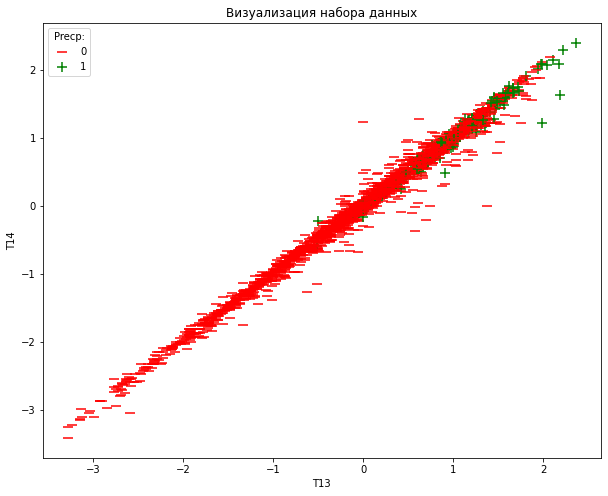

In [26]:
plt.figure(figsize=(10,8))
for i in range(len(Y)):
    if Y[i] == 0:
        scatter1 = plt.scatter(X[41][i], X[42][i], s=100, c="r", marker="_", label = "0")
    else:
        scatter2 = plt.scatter(X[41][i], X[42][i], s=100, c="g", marker="+", label = "1")

plt.legend(handles=[scatter1, scatter2], title="Precp:")
plt.xlabel("Т13")
plt.ylabel("Т14")
plt.title("Визуализация набора данных")


7.	Создайте модели классификации точек набора данных из двух признаков на базе классификаторов, указанных в индивидуальном задании. Используйте при обучении классификаторов разделение набора данных на обучающую и тестовую выборки в соотношении 70% на 30%. 

    Модели классификации: 

    -   наивный байесовский классификатор 

    -   классификатор логистической регрессии   

    -   классификатор логистической регрессии с полиномиальной зависимостью (degree=2) 

In [27]:
X = data_new[[41, 42]]
Y = data[73]
X.shape, Y.shape

((2534, 2), (2534,))

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=666)

In [29]:
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((1773, 2), (1773,), (761, 2), (761,))

наивный байесовский классификатор

In [30]:
from sklearn.naive_bayes import GaussianNB

nbc = GaussianNB()
nbc.fit(X_train,Y_train.values.ravel())
Y_pred = nbc.predict(X_test)

классификатор логистической регрессии   


In [31]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, Y_train.values.ravel())

LogisticRegression()


классификатор логистической регрессии с полиномиальной зависимостью (degree=2) 

In [32]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

def PolynomialLogisticRegression(degree):
    return Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('std_scaler', StandardScaler()),
        ('log_reg', LogisticRegression())
    ])

In [33]:
poly_log_reg = PolynomialLogisticRegression(degree=2)
poly_log_reg.fit(X_train, Y_train)

Pipeline(steps=[('poly', PolynomialFeatures()),
                ('std_scaler', StandardScaler()),
                ('log_reg', LogisticRegression())])


8. 	Визуализируйте для каждого из классификаторов границу принятия решения, подписывая оси и рисунок и создавая легенду для меток классов набора данных в соответствии с требованиями п. 6.  


In [34]:
def plot_decision_boundary(model, axis):
    
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1, 1),
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0, x1, zz, cmap=custom_cmap)
    

наивный байесовский классификатор

Text(0.5, 1.0, 'Визуализация границы принятия решений для наивного байесовского классификатора')

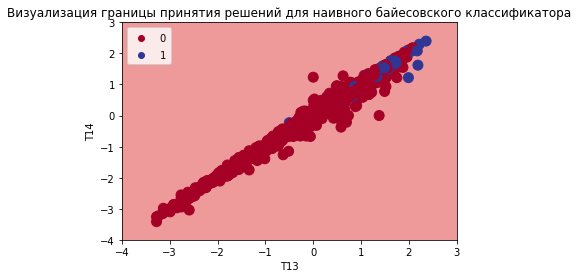

In [35]:
plot_decision_boundary(nbc, axis=[-4, 3, -4, 3])

scatter = plt.scatter(X[41], X[42], s=100, c=Y, cmap=plt.cm.RdYlBu)

plt.legend(*scatter.legend_elements())
plt.xlabel("Т13")
plt.ylabel("Т14")
plt.title("Визуализация границы принятия решений для наивного байесовского классификатора")

классификатор логистической регрессии  

Text(0.5, 1.0, 'Визуализация границы принятия решений для классификатора логической регрессии')

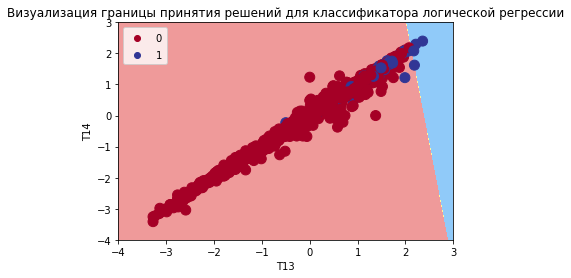

In [36]:
plot_decision_boundary(log_reg, axis=[-4, 3, -4, 3])

scatter = plt.scatter(X[41], X[42], s=100, c=Y, cmap=plt.cm.RdYlBu)

plt.legend(*scatter.legend_elements())
plt.xlabel("Т13")
plt.ylabel("Т14")
plt.title("Визуализация границы принятия решений для классификатора логической регрессии")

классификатор логистической регрессии с полиномиальной зависимостью (degree=2) 

Text(0.5, 1.0, 'Визуализация границы принятия решений для классификатора логистической регрессии с полиномиальной зависимостью')

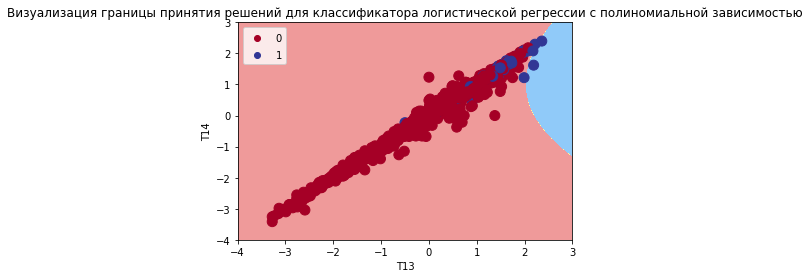

In [37]:
plot_decision_boundary(poly_log_reg, axis=[-4, 3, -4, 3])

scatter = plt.scatter(X[41], X[42], s=100, c=Y, cmap=plt.cm.RdYlBu)

plt.legend(*scatter.legend_elements())
plt.xlabel("Т13")
plt.ylabel("Т14")
plt.title("Визуализация границы принятия решений для классификатора логистической регрессии с полиномиальной зависимостью")


9. 	Визуализируйте на одном рисунке кривые бинарной классификации, указанные в индивидуальном задании, для каждого из классификаторов, подписывая оси и рисунок. Используйте в качестве меток легенды для названия классификаторов.  


In [38]:
scr_1 = nbc.predict_proba(X_test)
scr_2 = log_reg.decision_function(X_test)
scr_3 = poly_log_reg.decision_function(X_test)

In [39]:
scr_1 = scr_1[:,1]
scr_1.shape

(761,)

In [40]:
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((1773, 2), (1773,), (761, 2), (761,))

In [41]:
from sklearn.metrics import precision_recall_curve

prec_1, rc_1, thresholds_1 = precision_recall_curve(Y_test, scr_1)
prec_2, rc_2, thresholds_2 = precision_recall_curve(Y_test, scr_2) 
prec_3, rc_3, thresholds_3 = precision_recall_curve(Y_test, scr_3) 


In [43]:
def TN(y_true, y_predict):
    assert len(y_true) == len(y_predict)
    return np.sum((y_true == 0) & (y_predict == 0))

def FP(y_true, y_predict):
    assert len(y_true) == len(y_predict)
    return np.sum((y_true == 0) & (y_predict == 1))

def FN(y_true, y_predict):
    assert len(y_true) == len(y_predict)
    return np.sum((y_true == 1) & (y_predict == 0))
    
def TP(y_true, y_predict):
    assert len(y_true) == len(y_predict)
    return np.sum((y_true == 1) & (y_predict == 1))

In [44]:
def roc(X_test, Y_test, decision_scores, threshold):
    fprs = []
    tprs = []
    n = len(X_test)
    thresholds = np.arange(np.min(decision_scores), np.max(decision_scores), 0.1)
    for threshold in thresholds:
        y_predict = np.array(decision_scores >= threshold, dtype='int')
        fprs.append(FP(Y_test, y_predict)/n)
        tprs.append(TP(Y_test, y_predict)/n)
        
    plt.plot(fprs, tprs);

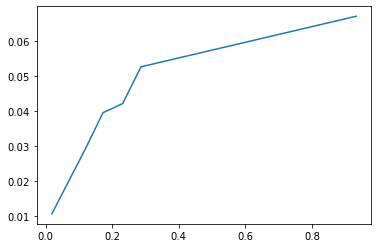

In [45]:
roc(X_test, Y_test, scr_1, thresholds_1)

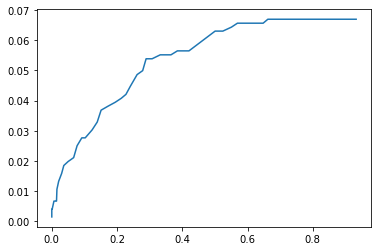

In [46]:
roc(X_test, Y_test, scr_2, thresholds_2)

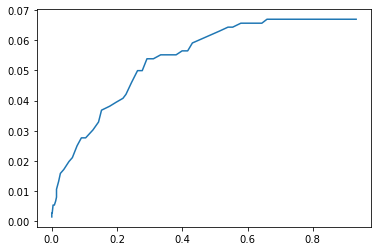

In [47]:
roc(X_test, Y_test, scr_3, thresholds_3)


10.	Определите лучший из используемых методов бинарной классификации по показателю площади, ограниченной кривой из п. 9.  


In [48]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [49]:
roc_auc_score(Y_test, scr_1)

0.7944766639049986

In [50]:
roc_auc_score(Y_test, scr_2)

0.8022093344380005

In [51]:
roc_auc_score(Y_test, scr_3)

0.8015465341066004

Получаем, что лучший метод - Классификатор логистической регрессии(2)